In [131]:
from plot_utils import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Comparison of Curriculum and No-Curriculum Aprroaches in Train

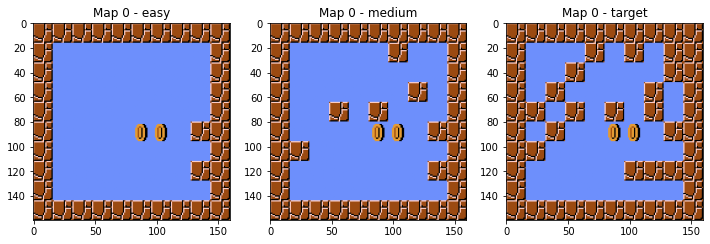

<Figure size 432x288 with 0 Axes>

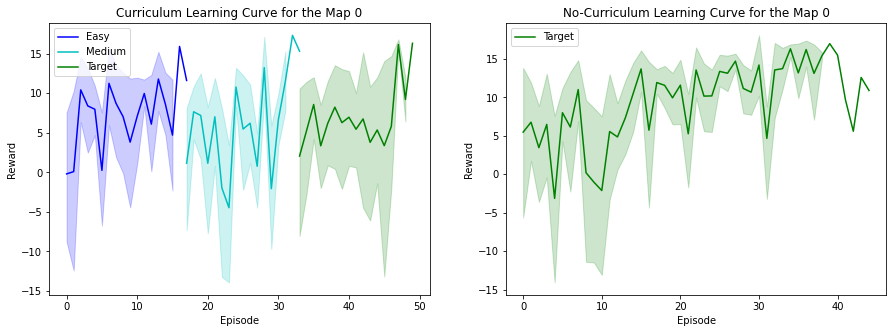

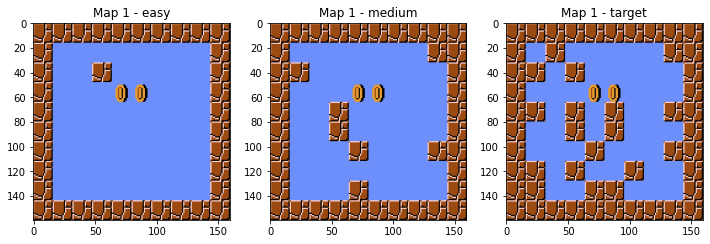

<Figure size 432x288 with 0 Axes>

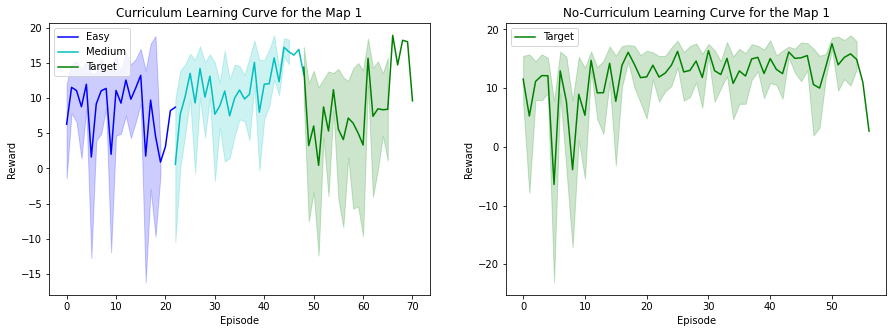

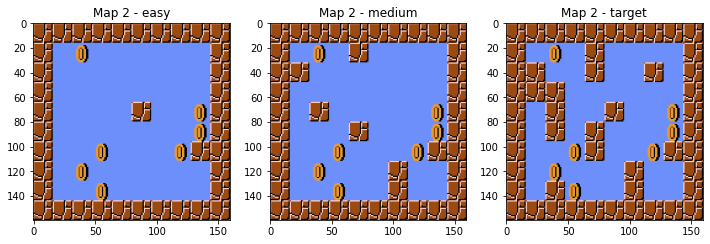

<Figure size 432x288 with 0 Axes>

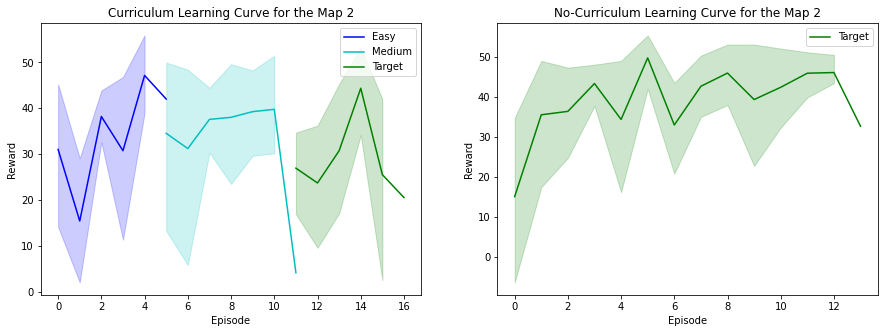

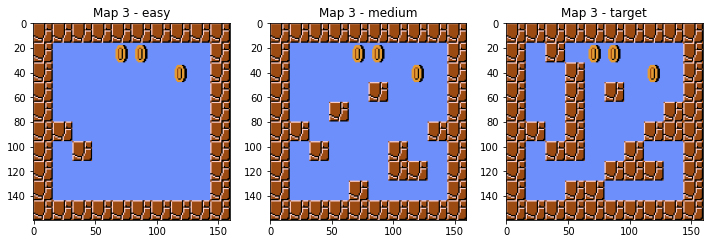

<Figure size 432x288 with 0 Axes>

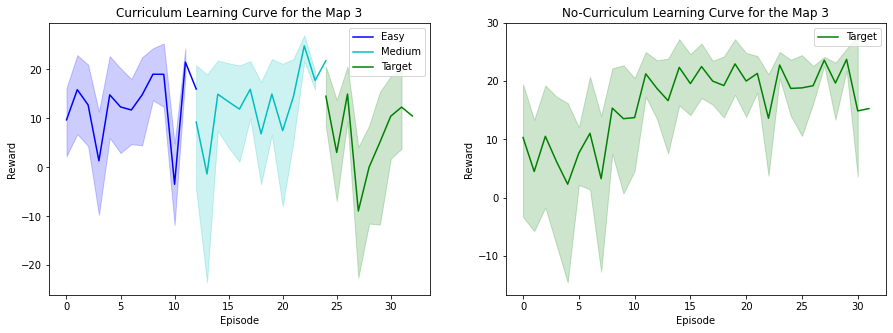

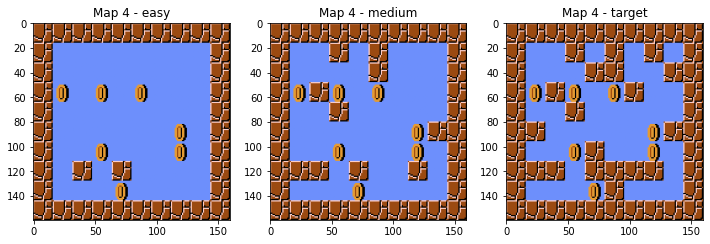

<Figure size 432x288 with 0 Axes>

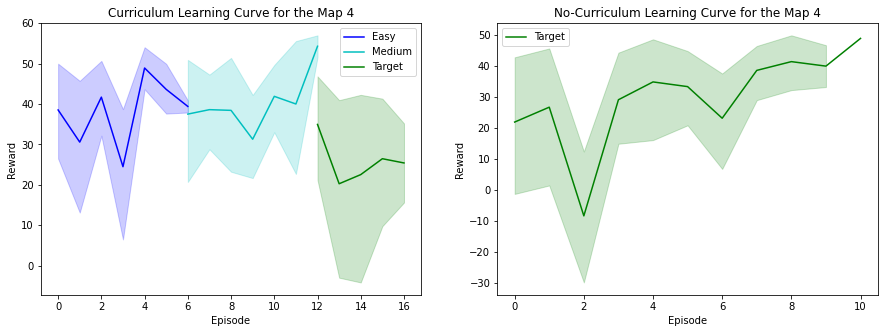

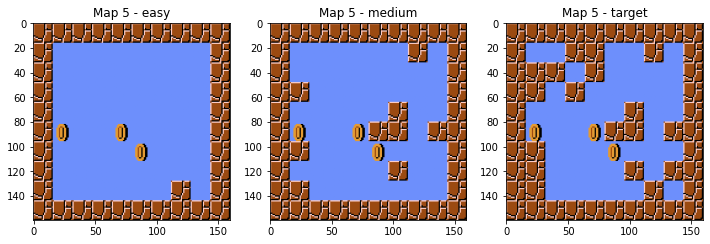

<Figure size 432x288 with 0 Axes>

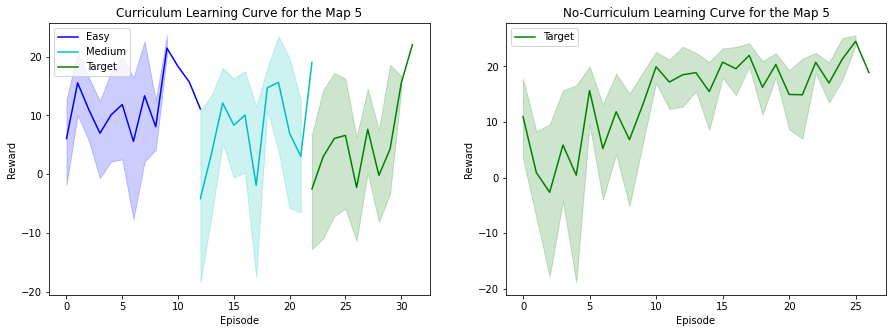

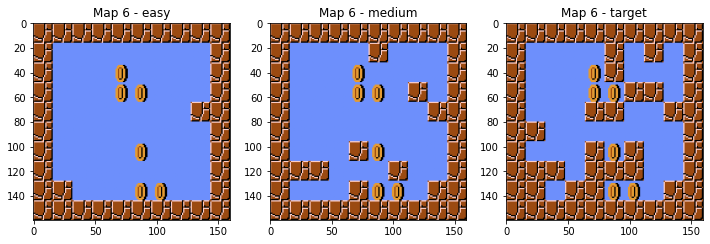

<Figure size 432x288 with 0 Axes>

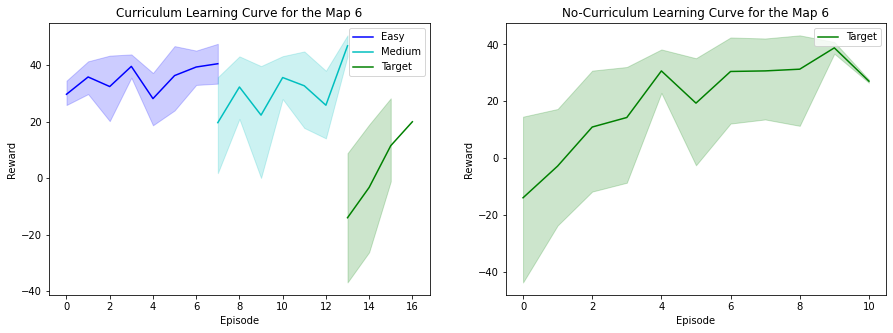

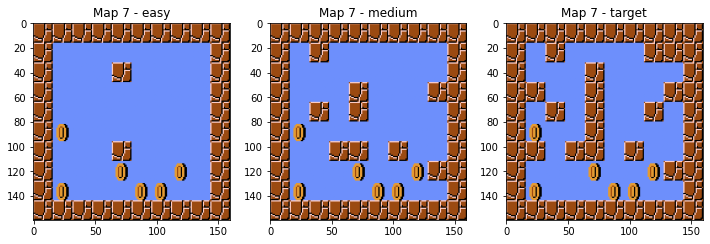

<Figure size 432x288 with 0 Axes>

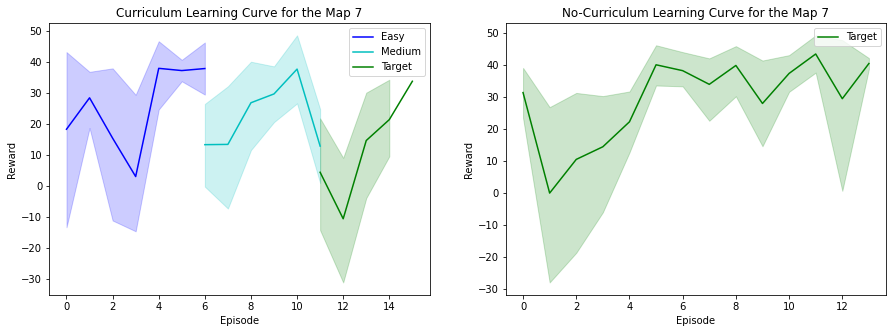

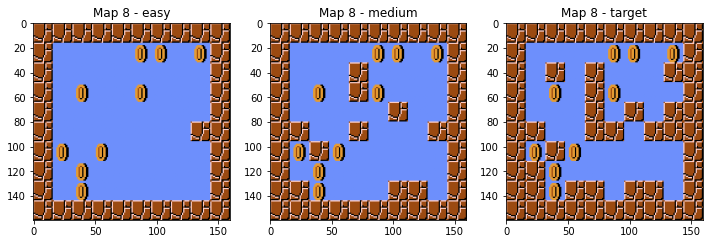

<Figure size 432x288 with 0 Axes>

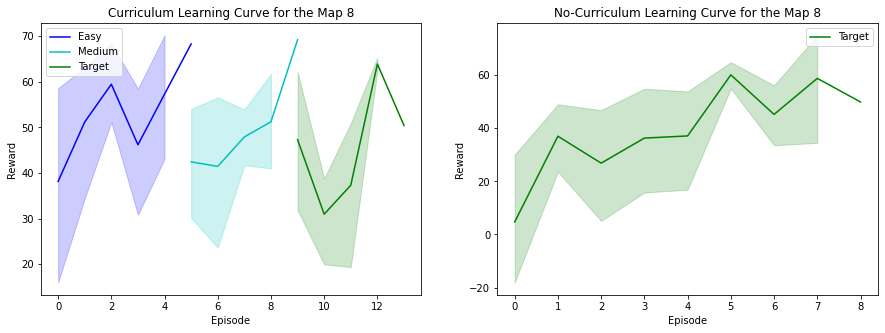

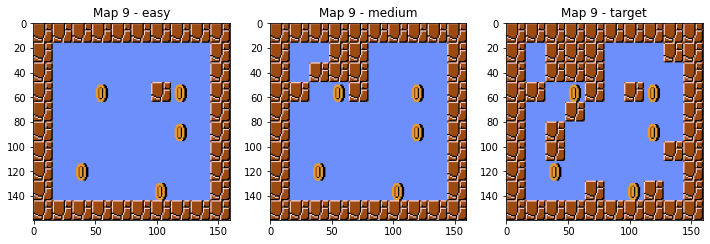

<Figure size 432x288 with 0 Axes>

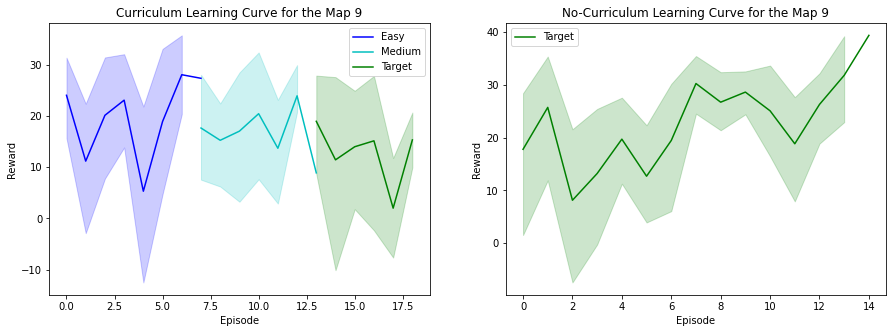

In [134]:
cur_folder = "output_cur_10"
nocur_folder = "output_nocur_10"
level_list = ["easy", "medium", "target"]    
map_lim = 10
for index in range(10):
    fig = plt.figure(figsize=(12, 12))
    for i, level in enumerate(level_list):
        title = "Map " + str(index) + " - " + level
        file_folder = "maps/rendered_" + str(map_lim) + "x" + str(map_lim) + "/" + level + "/map_" + str(index) + ".png"
        img = mpimg.imread(file_folder)
        fig.add_subplot(1, 3, i+1)
        imgplot = plt.imshow(img)
        plt.title(title)
    plt.show()
    show_both_approaches(curriculum_folder = cur_folder, nocurriculum_folder = nocur_folder,  index=index)
    
#     plot_both_approaches(folder=cur_folder, folder2=nocur_folder, index = index)
#     plot_curriculum_results(folder=cur_folder, index = index)
#     plot_results(folder=nocur_folder, index = index)

### Comparison of Curriculum and No-Curriculum Aprroaches in Test

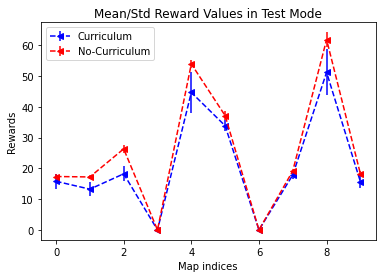

In [101]:
plt.errorbar(np.arange(len(cur_total_reward_list)), np.mean(cur_total_reward_list, axis=1), 
             np.std(cur_total_reward_list, axis=1), linestyle='--', marker='<', color='b')

plt.errorbar(np.arange(len(nocur_total_reward_list)), np.mean(nocur_total_reward_list, axis=1), 
             np.std(nocur_total_reward_list, axis=1), linestyle='--', marker='<', color='r')

plt.xlabel("Map indices")
plt.ylabel("Rewards")
plt.title("Mean/Std Reward Values in Test Mode")
plt.legend(["Curriculum", "No-Curriculum"])
plt.show()

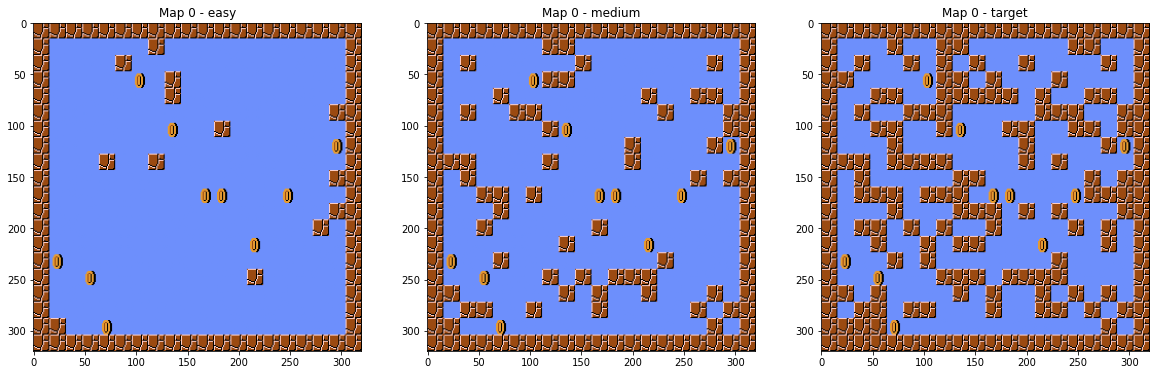

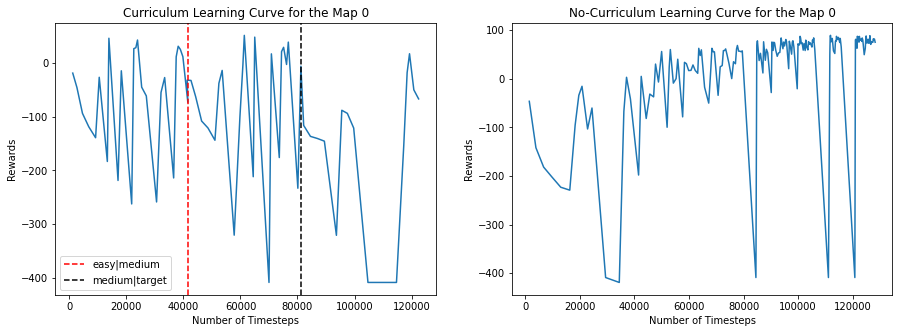

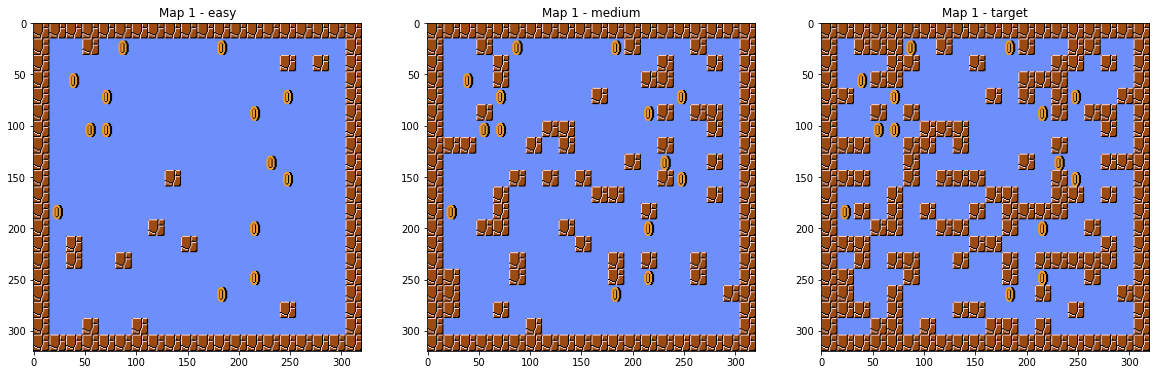

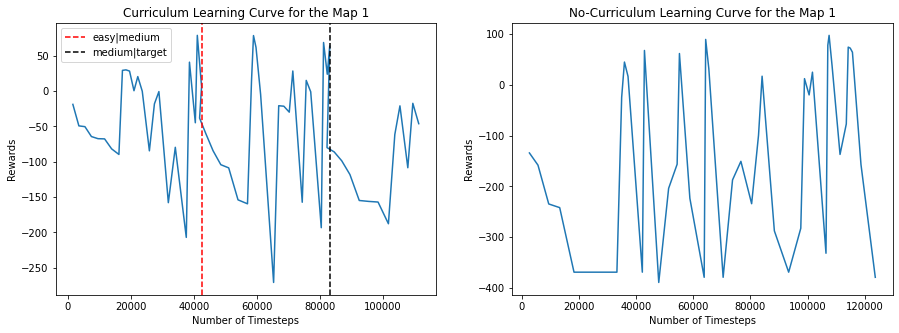

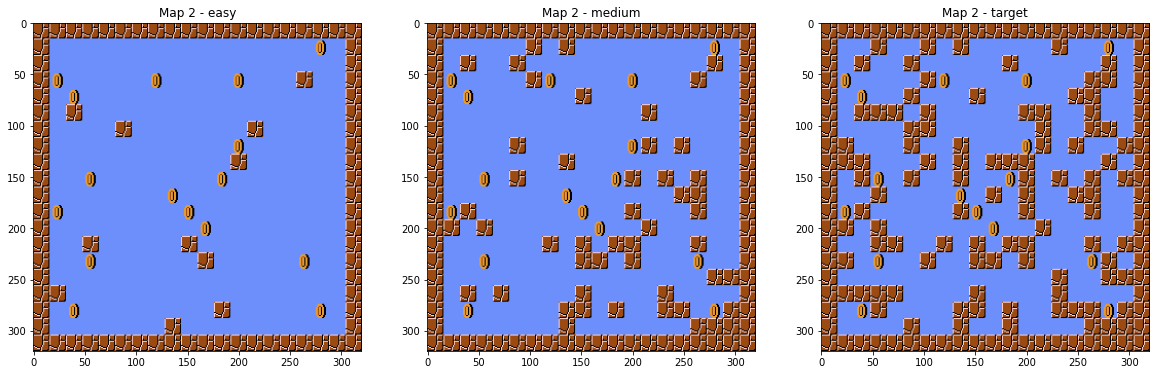

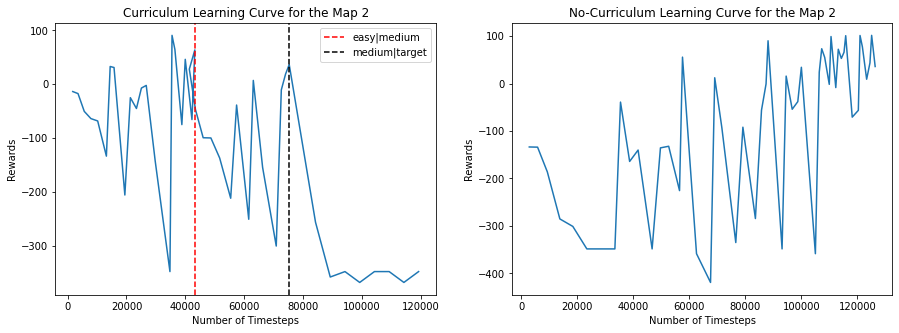

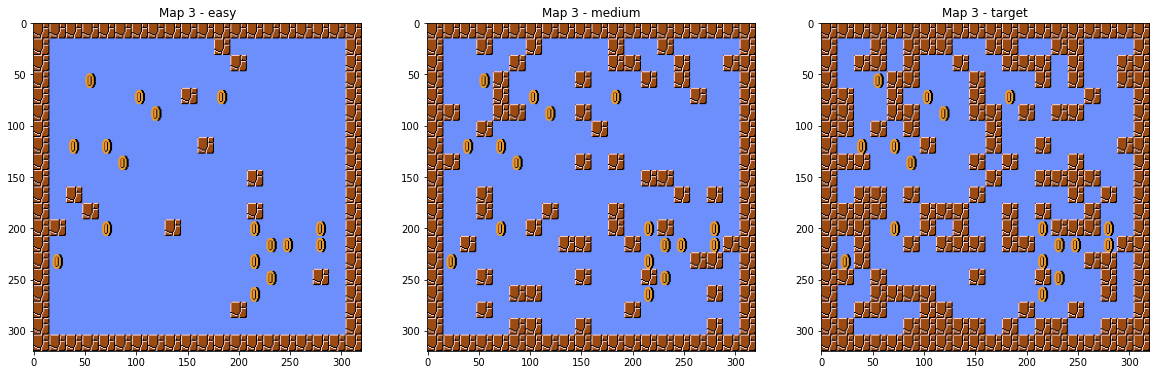

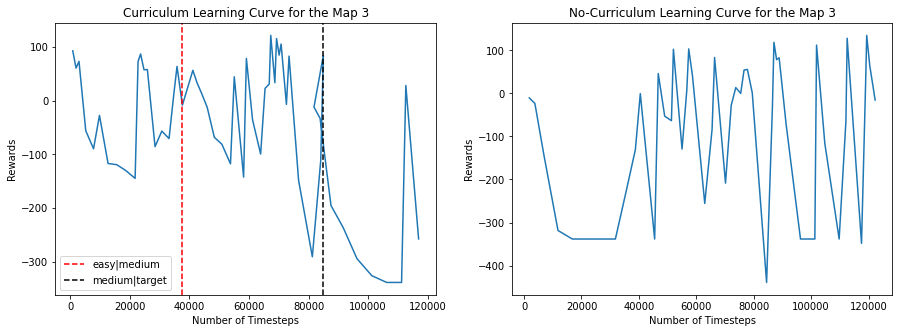

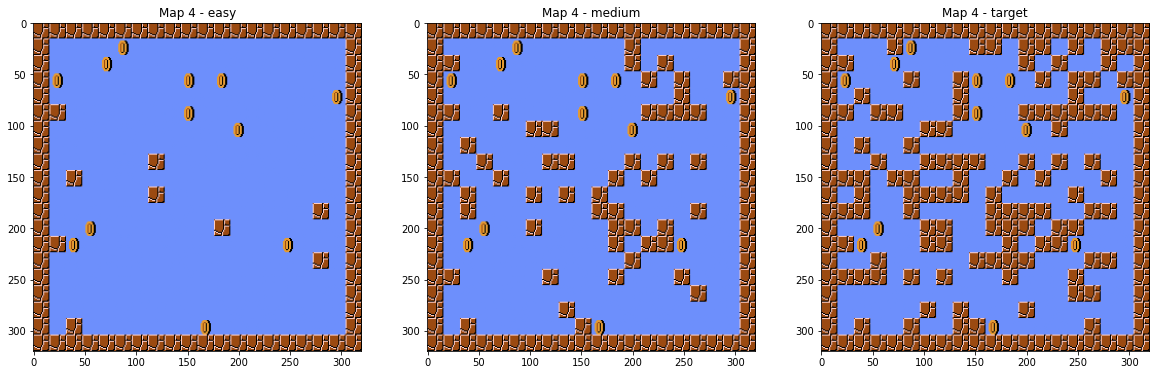

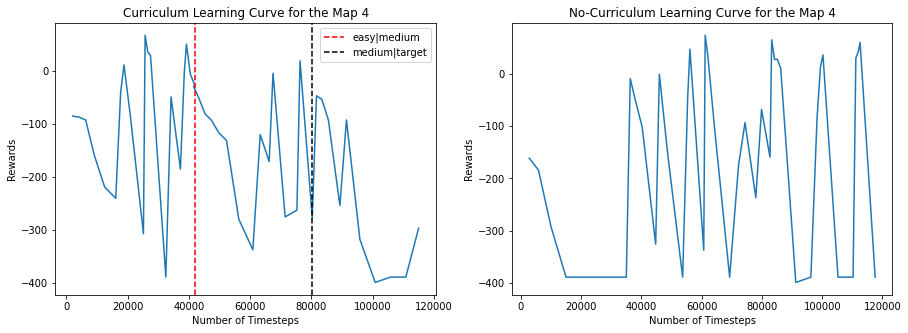

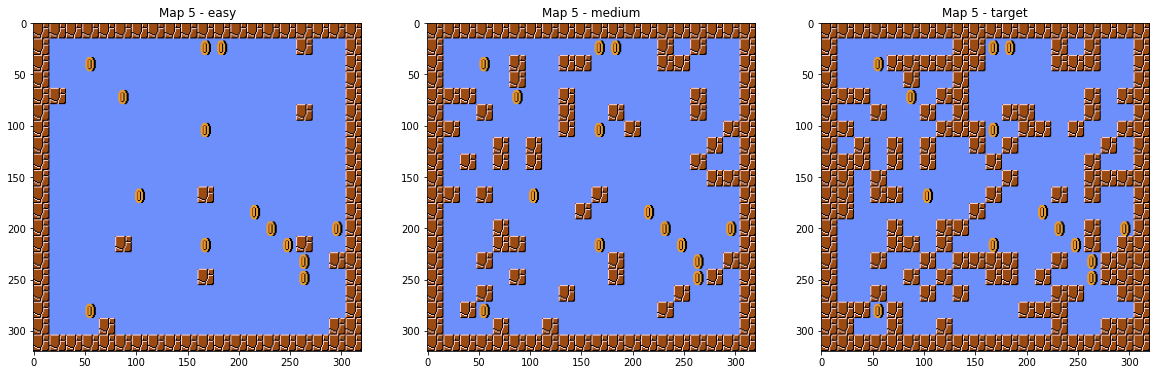

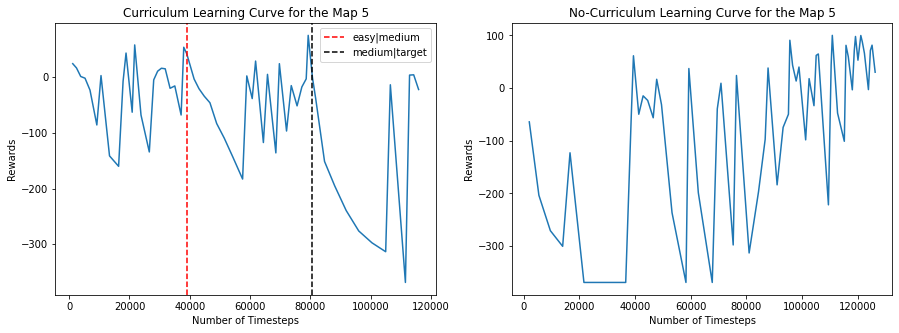

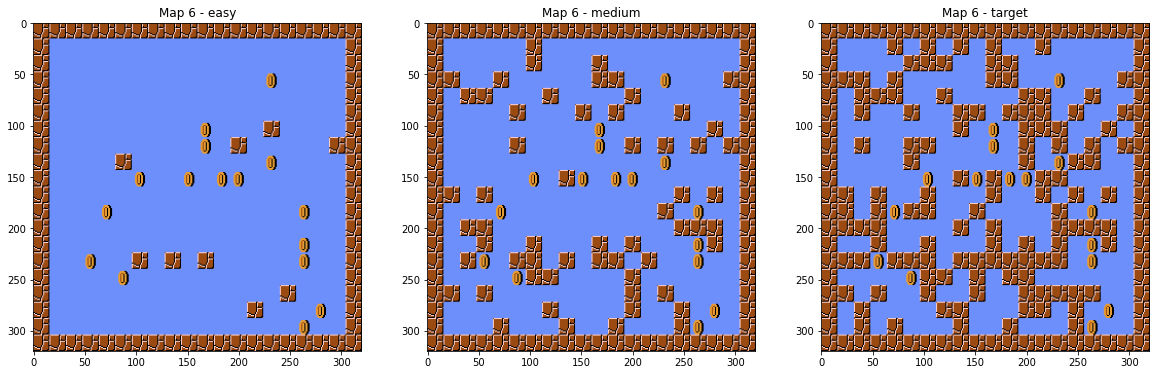

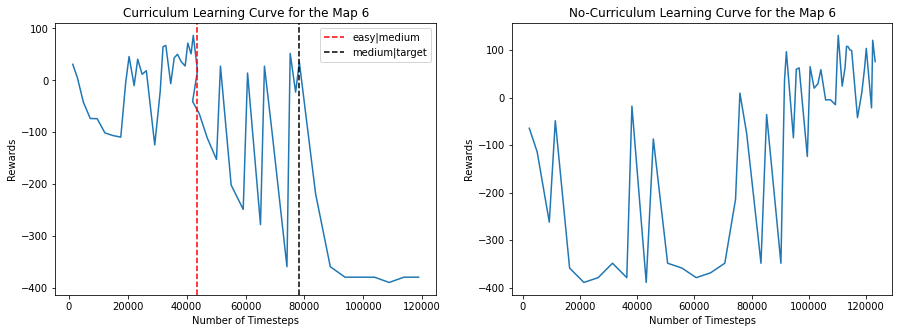

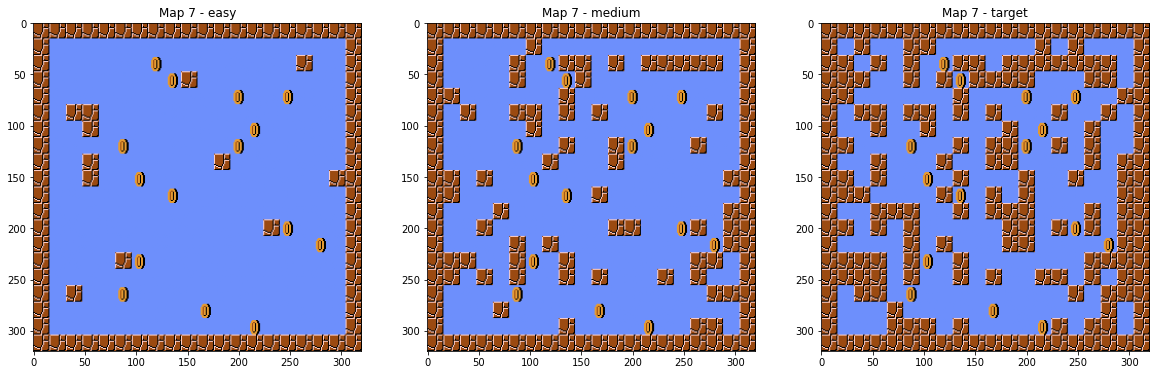

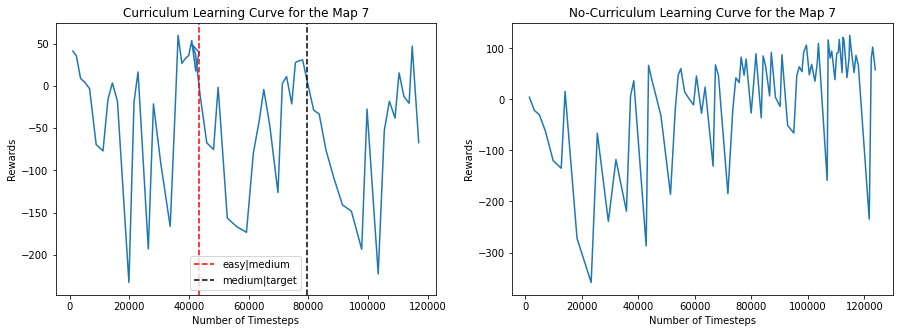

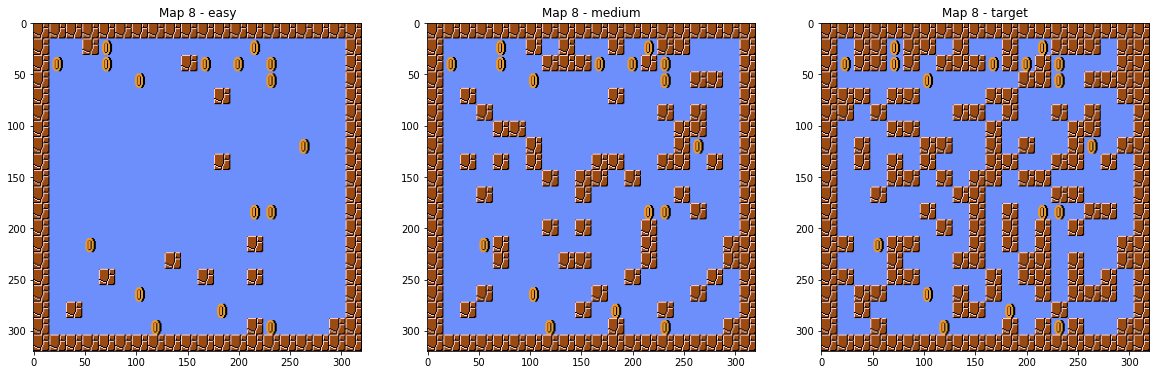

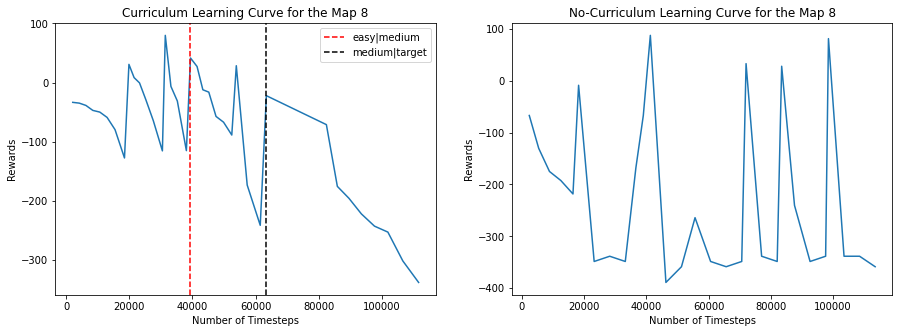

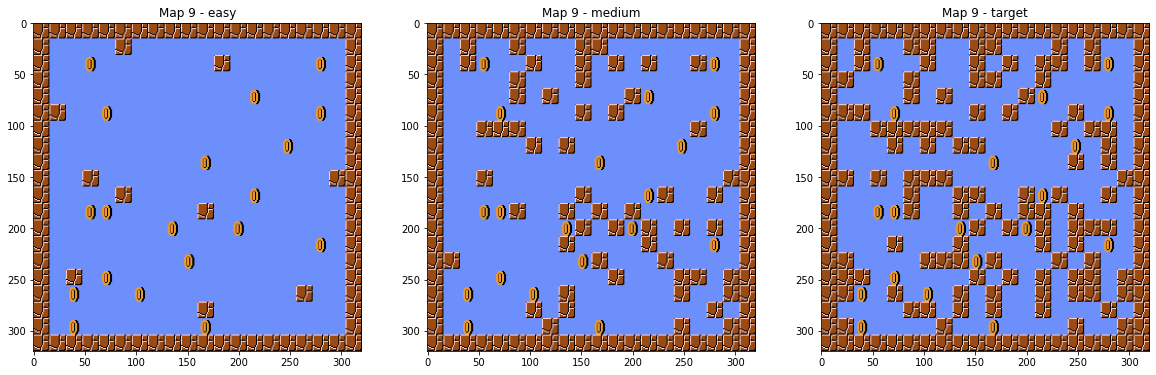

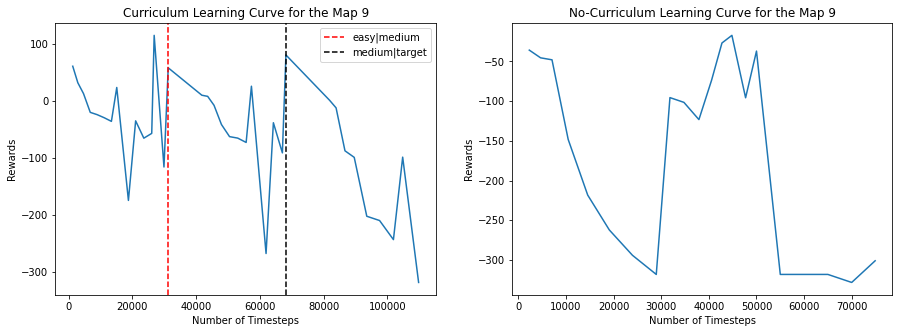

In [40]:
cur_folder = "output_cur_20/"
nocur_folder = "output_nocur_20/"
level_list = ["easy", "medium", "target"]    
for index in range(10):
    fig = plt.figure(figsize=(20, 20))
    for i, level in enumerate(level_list):
        title = "Map " + str(index) + " - " + level
        file_folder = "maps/rendered_20x20/" + level + "/map_" + str(index) + ".png"
        img = mpimg.imread(file_folder)
        fig.add_subplot(1, 3, i+1)
        imgplot = plt.imshow(img)
        plt.title(title)
    plt.show()
    plot_both_approaches(folder=cur_folder, index=index, folder2="output_nocur_20", limit=40000)
#     plot_curriculum_results(folder=cur_folder, index = index)
#     plot_results(folder=nocur_folder, index = index)

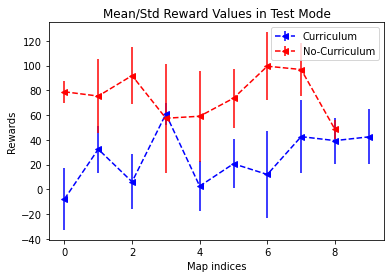

In [42]:
with open('results_cur_20.pickle', 'rb') as handle:
    cur_total_reward_list = pickle.load(handle)
    
with open('results_nocur_20.pickle', 'rb') as handle:
    nocur_total_reward_list = pickle.load(handle)

plt.errorbar(np.arange(len(cur_total_reward_list)), np.mean(cur_total_reward_list, axis=1), 
             np.std(cur_total_reward_list, axis=1), linestyle='--', marker='<', color='b')

plt.errorbar(np.arange(len(nocur_total_reward_list)), np.mean(nocur_total_reward_list, axis=1), 
             np.std(nocur_total_reward_list, axis=1), linestyle='--', marker='<', color='r')

plt.xlabel("Map indices")
plt.ylabel("Rewards")
plt.title("Mean/Std Reward Values in Test Mode")
plt.legend(["Curriculum", "No-Curriculum"])
plt.show()

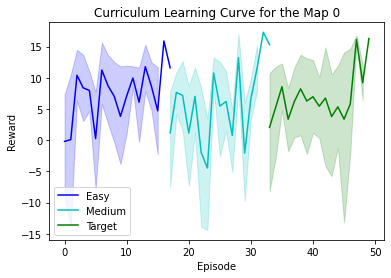

In [124]:
for i in range(1):
    save_figs(train_str = "output_cur_10", index=i, curriculum=True)
# save_figs(train_str = "output_nocur_00", index=0, curriculum=False)

## Creating New Maps

In [128]:
def get_indices(numbers, map_lim):
    index = []
    for number in numbers:
        x = number // map_lim
        y = number % map_lim
        index.append([x,y])
    return np.array(index)

def create_map_files(level = "target", map_lim = 10):
    predefined_obtacles = get_indices([i  for i in range(map_lim**2) if i% map_lim == 0 or i % map_lim == map_lim - 1 \
                                                                    or i // map_lim == 0 or i // map_lim == map_lim - 1], map_lim)
    map_list = []
    with open('saved_maps_' + str(map_lim) + '.pickle', 'rb') as handle:
        easy_list, medium_list, gen_list = pickle.load(handle)
            
    if level == "easy":
        current_list = np.copy(easy_list)
    elif level == "medium":
        current_list = np.copy(medium_list)
    elif level == "target":
        current_list = np.copy(gen_list)
            
    for current_map in current_list:
        current_map[0][predefined_obtacles[:,0], predefined_obtacles[:,1]] = 1 # predefined walls
        current_map[0][1,1] = 0 # Agent start location, obstacle free
        map_list.append(current_map[0])


    directory = "maps/maps_" + str(map_lim) + "x" + str(map_lim) + "/" + level
    if not os.path.exists(directory):
        os.makedirs(directory)
        
    for ind, current_map in enumerate(map_list):
        matrix = np.asarray([['-' for i in range(map_lim)] for j in range(map_lim)])
        matrix[current_map == 1] = 'W'
        matrix[current_map == 2] = 'X'

        with open(directory + "/map_" + str(ind) + ".txt", "w") as txt_file:
            for line in matrix:
                txt_file.write("".join(line) + "\n") # works with any number of elements in a line

map_lim = 20
create_maps(seed = 10, map_lim=map_lim, N_maps = 10)
level_list = ['easy', 'medium','target']
for level in level_list:
    create_map_files(level = level, map_lim = map_lim)